# Chess Data - Trying to find something "interesting"

In [68]:
import json
from pprint import pprint
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import plotly.offline as py
py.init_notebook_mode()

%matplotlib inline  

## Opening up One JSON file

I've split the JSON files by player and the color pieces they were playing. 

The file format is **PlayerName.asblack_stats.json** and **PlayerName.aswhite_stats.json**

In [84]:
# Open one of the files as an example
with open('./json/Adams.asblack_stats.json') as data_file:    
    data = json.load(data_file)

In [128]:
# Show what the content looks like.
# I'm focusing on the Heatmaps:moveSquares for now
pprint(data, depth=2)

{'heatmaps': {'captureSquares': [...],
              'checkSquares': [...],
              'moveSquares': [...],
              'squareUtilization': [...]},
 'moves': {'Bc1': {...},
           'Bc8': {...},
           'Bf1': {...},
           'Bf8': {...},
           'Ke1': {...},
           'Ke8': {...},
           'Nb1': {...},
           'Nb8': {...},
           'Ng1': {...},
           'Ng8': {...},
           'Qd1': {...},
           'Qd8': {...},
           'Ra1': {...},
           'Ra8': {...},
           'Rh1': {...},
           'Rh8': {...},
           'a2': {...},
           'a7': {...},
           'b2': {...},
           'b7': {...},
           'c2': {...},
           'c7': {...},
           'd2': {...},
           'd7': {...},
           'e2': {...},
           'e7': {...},
           'f2': {...},
           'f7': {...},
           'g2': {...},
           'g7': {...},
           'h2': {...},
           'h7': {...}},
 'openings': {'children': [...], 'san': 'start'}}


Convert to pandas dataframe

In [ ]:
movesquares = pd.DataFrame(data["heatmaps"]["moveSquares"])

In [89]:
movesquares.head()

all                     b                    k  \
0  {'w': 104, 'b': 1627}     {'w': 7, 'b': 36}    {'w': 2, 'b': 18}   
1  {'w': 109, 'b': 2087}    {'w': 14, 'b': 19}    {'w': 4, 'b': 49}   
2  {'w': 103, 'b': 2426}  {'w': 15, 'b': 1522}   {'w': 3, 'b': 134}   
3  {'w': 129, 'b': 2413}    {'w': 20, 'b': 77}    {'w': 1, 'b': 58}   
4  {'w': 101, 'b': 2580}     {'w': 8, 'b': 46}  {'w': 3, 'b': 1604}   

                     n                 p                     q  \
0     {'w': 0, 'b': 5}  {'w': 0, 'b': 0}    {'w': 19, 'b': 61}   
1  {'w': 6, 'b': 1522}  {'w': 0, 'b': 0}   {'w': 27, 'b': 101}   
2    {'w': 6, 'b': 38}  {'w': 0, 'b': 0}   {'w': 36, 'b': 125}   
3    {'w': 6, 'b': 42}  {'w': 0, 'b': 0}  {'w': 33, 'b': 1520}   
4   {'w': 9, 'b': 118}  {'w': 0, 'b': 0}   {'w': 28, 'b': 102}   

                      r  
0  {'w': 76, 'b': 1507}  
1   {'w': 58, 'b': 396}  
2   {'w': 43, 'b': 607}  
3   {'w': 69, 'b': 716}  
4   {'w': 53, 'b': 710}

In [90]:
# Pull only the moves as black by applying the lamda function only selecting 'b'
movesquares["all_black"] = movesquares["all"].map(lambda v: v['b'])

In [91]:
movesquares['proportional_moves'] = (movesquares["all_black"]/np.sum(movesquares["all_black"]))*100

In [92]:
movesquares.head()

all                     b                    k  \
0  {'w': 104, 'b': 1627}     {'w': 7, 'b': 36}    {'w': 2, 'b': 18}   
1  {'w': 109, 'b': 2087}    {'w': 14, 'b': 19}    {'w': 4, 'b': 49}   
2  {'w': 103, 'b': 2426}  {'w': 15, 'b': 1522}   {'w': 3, 'b': 134}   
3  {'w': 129, 'b': 2413}    {'w': 20, 'b': 77}    {'w': 1, 'b': 58}   
4  {'w': 101, 'b': 2580}     {'w': 8, 'b': 46}  {'w': 3, 'b': 1604}   

                     n                 p                     q  \
0     {'w': 0, 'b': 5}  {'w': 0, 'b': 0}    {'w': 19, 'b': 61}   
1  {'w': 6, 'b': 1522}  {'w': 0, 'b': 0}   {'w': 27, 'b': 101}   
2    {'w': 6, 'b': 38}  {'w': 0, 'b': 0}   {'w': 36, 'b': 125}   
3    {'w': 6, 'b': 42}  {'w': 0, 'b': 0}  {'w': 33, 'b': 1520}   
4   {'w': 9, 'b': 118}  {'w': 0, 'b': 0}   {'w': 28, 'b': 102}   

                      r  all_black  proportional_moves  
0  {'w': 76, 'b': 1507}       1627            2.692639  
1   {'w': 58, 'b': 396}       2087            3.453926  
2   {'w': 43, 'b': 607}       2426            4.014961  
3   {'w': 69, 'b': 716}       2413            3.993446  
4   {'w': 53, 'b': 710}       2580            4.269827

## Make a list of all the GMs
This list is so I can loop through all the files and store. I've commented out a few of the players. That is because they only have a few games of data and results as them looking like outliers on the plots. We should pick a cutoff point where we don't show player with less than X games.

In [93]:
all_gms = ['Adams','Akobian','Akopian','Alburt','Alekhine','Alekseev','Almasi','Anand','Anderssen','Andersson','Andreikin','Aronian','Ashley',
'Averbakh','Azmaiparashvili','Bacrot','Bareev','BecerraRivero','Beliavsky','Benjamin','Benko',
           #'Berliner',
           'Bernstein','Bird','Bisguier','Blackburne',
'Blatny','Bogoljubow','Boleslavsky','Bologan','Botvinnik','Breyer','Bronstein','Browne','Bruzon','Bu','Byrne','Capablanca','Carlsen','Caruana',
'Chiburdanidze','Chigorin','Christiansen','DeFirmian',
           #'DeLaBourdonnais',
           'Denker','Ding','DominguezPerez','Dreev','Dzindzichashvili','Ehlvest',
'Eljanov','Euwe','Evans','Fedorowicz','Fine','Finegold','Fischer','Fishbein','Flohr','Gaprindashvili','Gashimov','Gelfand','Geller','Georgiev','Giri',
'Gligoric','Goldin','GrandaZuniga','Grischuk','Gulko','Gunsberg','GurevichD','GurevichM','Harikrishna','Hort','Horwitz','Hou','Huebner','Ibragimov',
'IllescasCordoba','Inarkiev','Ivanchuk','IvanovA','IvanovI','Ivkov','Jakovenko','Janowski','Jobava','Jussupow','Kaidanov','Kamsky','Karjakin',
'Karpov','Kasimdzhanov','Kasparov','Kavalek','Keres','Khalifman','Kholmov','Koneru','Korchnoi','Korobov','Kosteniuk','Kotov','Kramnik',
'Krasenkow','Krush','Kudrin','Lahno','Larsen','Lasker','Lautier','Le','Leko','Levenfish','Li','Lilienthal','Ljubojevic','Lputian','MacKenzie','Malakhov',
'Mamedyarov','Maroczy','Marshall',
           #'McDonnell',
           'McShane','Mecking','Mikenas','Miles','Milov','Morozevich','Morphy','Motylev','Movsesian',
'Muzychuk','Najdorf','Najer','Nakamura','Navara','Negi','Nepomniachtchi','Ni','Nielsen','Nikolic','Nimzowitsch','Nisipeanu','Novikov','Nunn',
'Olafsson','Oll','Onischuk','Pachman','Paehtz','Panno','Paulsen','Petrosian',
#'Philidor',
           'Pillsbury','Pilnik','PolgarJ','PolgarS','PolgarZ','Polugaevsky',
'Ponomariov','Portisch','Psakhis','Quinteros','Radjabov','Reshevsky','Reti','Ribli','Rohde','Rubinstein','Rublevsky','Saemisch','Sakaev','Salov',
'Sasikiran','Schlechter','Seirawan','Serper','Shabalov','Shamkovich','Shirov','Short','Shulman','Smirin','Smyslov','So','Sokolov','Soltis','Spassky',
'Speelman','Spielmann','Stahlberg','Staunton','Stefanova','Stein','Steinitz','Suetin','SultanKhan','Sutovsky','Svidler','Szabo','Taimanov','Tal',
'Tarrasch','Tartakower','Teichmann','Timman','Tiviakov','Tkachiev','Tomashevsky','Topalov','TorreRepetto','Uhlmann','Unzicker','Ushenina',
'VachierLagrave','Vaganian','VallejoPons','VanWely','Vitiugov','Volokitin','Waitzkin','Wang','WangH','Wei','Winawer','Wojtaszek','Wojtkiewicz',
'Wolff','Xie','Xu','Ye','Yermolinsky','Yu','Yudasin','Zhu','Zukertort','Zvjaginsev']

## Key List
This is the move square in relation to where they are in the JSON file. I use this to change the index of the dataframe.

In [94]:
key = ['a8', 'b8', 'c8', 'd8', 'e8', 'f8', 'g8', 'h8',
'a7', 'b7', 'c7', 'd7', 'e7', 'f7', 'g7', 'h7',
'a6', 'b6', 'c6', 'd6', 'e6', 'f6', 'g6', 'h6',
'a5', 'b5', 'c5', 'd5', 'e5', 'f5', 'g5', 'h5',
'a4', 'b4', 'c4', 'd4', 'e4', 'f4', 'g4', 'h4',
'a3', 'b3', 'c3', 'd3', 'e3', 'f3', 'g3', 'h3',
'a2', 'b2', 'c2', 'd2', 'e2', 'f2', 'g2', 'h2',
'a1', 'b1', 'c1', 'd1', 'e1', 'f1', 'g1', 'h1']

# Pull data for all GMs - All Pieces

This is where I pull the white and black piece moves for each GM. I filter only out the color that they are playing.

Then I normalize their move count into a percentage so we can compare between GMs.

In [99]:
def pull_move_data(piece_type):
    white_moves = pd.DataFrame()
    black_moves = pd.DataFrame()

    for x in all_gms:
        # print("----",x)
        white_file = './json/{}.aswhite_stats.json'.format(x)
        black_file = './json/{}.asblack_stats.json'.format(x)
        with open(white_file) as data_file:    
            white_data = json.load(data_file)
        with open(black_file) as data_file:    
            black_data = json.load(data_file)

        # print("White")
        movesquares_white = pd.DataFrame(white_data["heatmaps"]["moveSquares"])
        movesquares_white["all_white"] = movesquares_white[piece_type].map(lambda v: v['w'])
        w_moves = movesquares_white["all_white"]/np.sum(movesquares_white["all_white"])*100
        white_moves[x] = w_moves
        # print("Black")
        movesquares_black = pd.DataFrame(black_data["heatmaps"]["moveSquares"])
        movesquares_black["all_black"] = movesquares_black[piece_type].map(lambda v: v['b'])
        b_moves = movesquares_black["all_black"]/np.sum(movesquares_black["all_black"])*100
        black_moves[x] = b_moves

    white_moves.index=key
    black_moves.index=key
    
    return white_moves, black_moves

### The docs say the data is stored by piece type [all, k, q, r, b, k, p]
https://ebemunk.com/chess-dataviz/#heatmap-data

In [101]:
all_moves_white, all_moves_black = pull_move_data('all')

In [102]:
all_moves_white.head()

Adams   Akobian   Akopian    Alburt  Alekhine  Alekseev    Almasi  \
a8  0.168412  0.157502  0.212232  0.264795  0.163616  0.120912  0.195834   
b8  0.176067  0.194562  0.212232  0.160108  0.194442  0.143407  0.165314   
c8  0.173005  0.319637  0.235526  0.283269  0.218154  0.171527  0.167858   
d8  0.171474  0.217724  0.243290  0.209372  0.170729  0.174338  0.190747   
e8  0.159226  0.148237  0.207055  0.209372  0.130418  0.149031  0.147511   

       Anand  Anderssen  Andersson     ...         Wolff       Xie        Xu  \
a8  0.229083   0.109152   0.170601     ...      0.158862  0.155185  0.073556   
b8  0.165531   0.075567   0.134473     ...      0.121038  0.121449  0.119529   
c8  0.174399   0.075567   0.210742     ...      0.166427  0.141691  0.137918   
d8  0.215782   0.142737   0.214756     ...      0.166427  0.276635  0.193086   
e8  0.165531   0.151134   0.168593     ...      0.166427  0.141691  0.156307   

          Ye  Yermolinsky        Yu   Yudasin       Zhu  Zukertort  Zvjaginsev  
a8  0.158802     0.203630  0.284807  0.130696  0.216539   0.122399    0.199112  
b8  0.143678     0.196609  0.238117  0.187213  0.220273   0.192341    0.238934  
c8  0.189050     0.189587  0.266131  0.162487  0.238940   0.384683    0.168479  
d8  0.128554     0.133413  0.359511  0.211939  0.268807   0.192341    0.223618  
e8  0.211736     0.133413  0.219442  0.144825  0.253873   0.192341    0.153163  

[5 rows x 238 columns]

In [105]:
all_moves_black.plot(figsize=(15,5), legend=False, title='Move Location by Player as Black')
fig = plt.gcf() # "Get current figure"
py.iplot_mpl(fig) # Make interactive!

In [106]:
all_moves_white.plot(figsize=(15,5), legend=False, title='Move Location by Player as White')
fig = plt.gcf() # "Get current figure"
py.iplot_mpl(fig)

# Queens

In [107]:
white_queen_moves, black_queen_moves = pull_move_data('q')

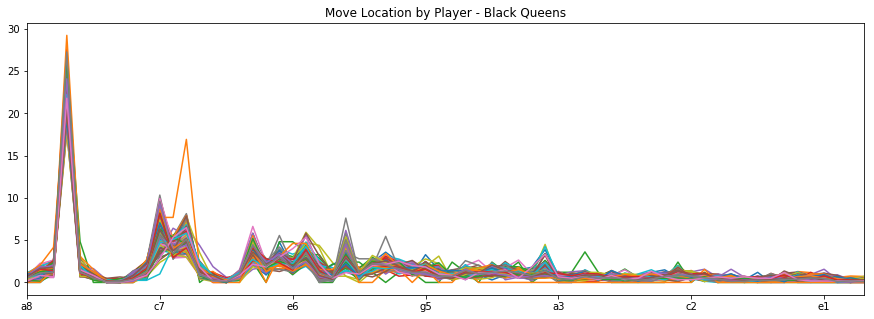

In [108]:
black_queen_moves.plot(figsize=(15,5), legend=False, title='Move Location by Player - Black Queens')

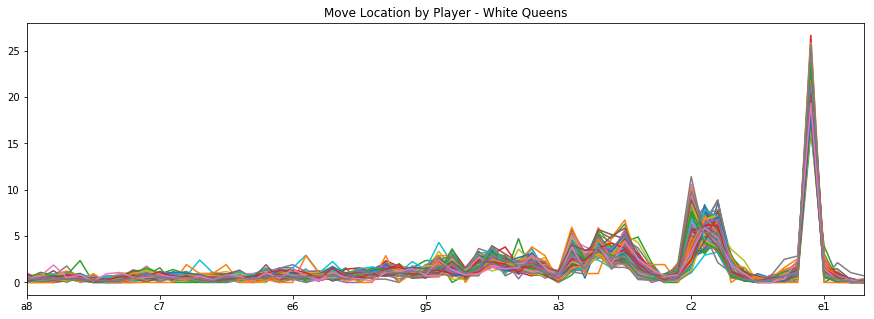

In [109]:
white_queen_moves.plot(figsize=(15,5), legend=False, title='Move Location by Player - White Queens')

# Bishops

In [110]:
white_bishops_moves, black_bishops_moves = pull_move_data('b')

In [111]:
black_bishops_moves.plot(figsize=(15,5), legend=False, title='Move Location by Player - Black Queens')
fig = plt.gcf() # "Get current figure"
py.iplot_mpl(fig)

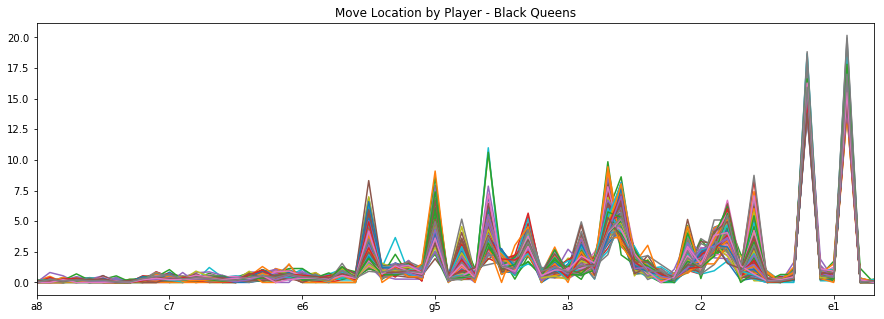

In [112]:
white_bishops_moves.plot(figsize=(15,5), legend=False, title='Move Location by Player - Black Queens')

# Pawns

In [114]:
white_pawns_moves, black_pawns_moves = pull_move_data('p')

In [115]:
black_pawns_moves.plot(figsize=(15,5), legend=False, title='Move Location by Player - Black Pawns')
fig = plt.gcf() # "Get current figure"
py.iplot_mpl(fig)

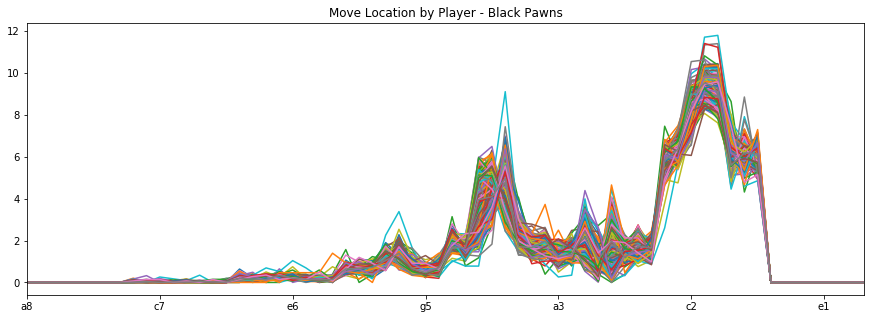

In [116]:
white_pawns_moves.plot(figsize=(15,5), legend=False, title='Move Location by Player - Black Pawns')

## Rooks

In [117]:
white_rook_moves, black_rook_moves = pull_move_data('r')

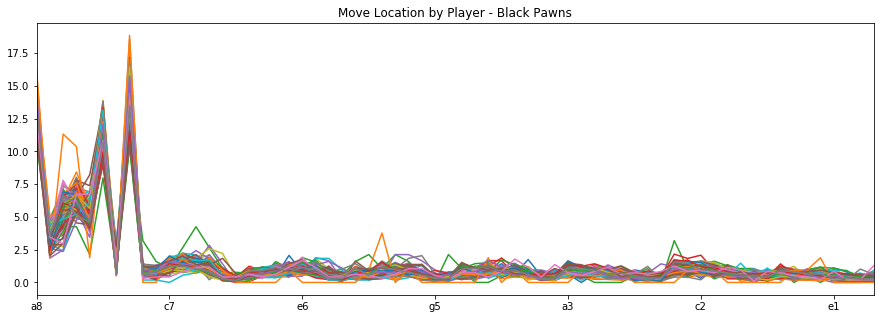

In [118]:
black_rook_moves.plot(figsize=(15,5), legend=False, title='Move Location by Player - Black Pawns')

In [119]:
white_rook_moves.plot(figsize=(15,5), legend=False, title='Move Location by Player - Black Pawns')
fig = plt.gcf() # "Get current figure"
py.iplot_mpl(fig, strip_style=True)